In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import glob
import os
import pandas as pd
import scipy

<font size = 4> <b> Defining functions

In [2]:
def onset_clip(x, x_split, sr):
    """
    Returns 0.3s onset_clip (0.1s before and 0.2s after the detected onset) after detecting onset based on librosa 
    and correlation between x and x_split
    """
    corr = scipy.signal.correlate(x, x_split, mode='full')
    corr_max = np.argmax(corr)-len(x_split)
    onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
    onset_times = librosa.frames_to_time(onset_frames)
    onset_samples = onset_times * int(sr)
    onset_arg = np.argmin(np.abs(onset_samples-corr_max))
    onset_num = onset_samples[onset_arg]
    onset_clip = x[int(onset_num) - int(0.1 * sr): int(onset_num) + int(0.2 * sr)]
    return onset_clip, onset_num

def wav_path_gen(files):
    """
    Generates path of corresponding wav_split_file
    Input: Subfolder of the form 'Dataset/wav/1/hamming_whole_step/filename.wav'
    """  
    wav_file = []
    for file in files:
        test = file.split('/')
        wav_name = test[4].split('.')[0].split('_')
        path = test[0] + '/wav/' + test[2] + '/' + test[3] + '/'
        wav_path = []
        for i in np.arange(len(wav_name)-1):   
            path = path + wav_name[i] +'_'
        wav_file.append(path[:-1] + '.wav')
    return wav_file

def wav_split_onset_num(files):
    path = []
    for file in files:
        path_test = file.split('/')[0] + '/wav_split/' + file.split('/')[2] + '/' + file.split('/')[3] + '/' + file.split('/')[4]
        path.append(path_test)
    return path

<font size = 4> <b> Onset detection for one file from each playing style

In [32]:
# Reading 4s files
resample_rate = 22050
x_pull, sr = librosa.load('Dataset/wav/1/pulling_whole_step/pulling_whole_step_1.wav', sr = resample_rate)
x_hamm, sr = librosa.load('Dataset/wav/1/hamming_whole_step/hamming_whole_step_1.wav', sr = resample_rate)
x_slide, sr = librosa.load('Dataset/wav/1/slide_whole_step_up/slide_whole_step_up_1.wav', sr = resample_rate)
x_bend, sr = librosa.load('Dataset/wav/1/bending_up_whole/bending_up_whole_1.wav', sr = resample_rate)
x_norm, sr = librosa.load('Dataset/wav/1/normal/normal_1.wav', sr = resample_rate)
x_norm1, sr = librosa.load('Dataset/wav/1/normal_whole_step_up/normal_whole_step_up_1.wav', sr = resample_rate)
x_mute, sr = librosa.load('Dataset/wav/1/mute/mute_1.wav', sr = resample_rate)
x_trill, sr = librosa.load('Dataset/wav/1/trill/trill_2.wav', sr = resample_rate)
x = [x_pull, x_hamm, x_slide, x_bend, x_norm, x_norm1, x_mute, x_trill]

In [33]:
# Reading split files
x_pull_split, sr = librosa.load('Dataset/wav_split/1/pulling_whole_step/pulling_whole_step_1_1.wav', sr = resample_rate)
x_hamm_split, sr = librosa.load('Dataset/wav_split/1/hamming_whole_step/hamming_whole_step_1_1.wav', sr = resample_rate)
x_slide_split, sr = librosa.load('Dataset/wav_split/1/slide_whole_step_up/slide_whole_step_up_1_1.wav', sr = resample_rate)
x_bend_split, sr = librosa.load('Dataset/wav_split/1/bending_up_whole/bending_up_whole_1_1.wav', sr = resample_rate)
x_norm_split, sr = librosa.load('Dataset/wav_split/1/normal/normal_1_1.wav', sr = resample_rate)
x_norm1_split, sr = librosa.load('Dataset/wav_split/1/normal_whole_step_up/normal_whole_step_up_1_1.wav', sr = resample_rate)
x_mute_split, sr = librosa.load('Dataset/wav_split/1/mute/mute_1_1.wav', sr = resample_rate)
x_trill_split, sr = librosa.load('Dataset/wav_split/1/trill/trill_2_1.wav', sr = resample_rate)
x_split = [x_pull_split, x_hamm_split, x_slide_split, x_bend_split, x_norm_split, x_norm1_split, x_mute_split, x_trill_split]

In [34]:
title = ['pull', 'hamm', 'slide', 'bend', 'norm', 'norm1', 'mute', 'trill']

<font size = 4> Detecting Onset using librosa and picking the one closest to maximum correlation between wav and corresponding wav_split file

/Users/saksham/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/Users/saksham/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


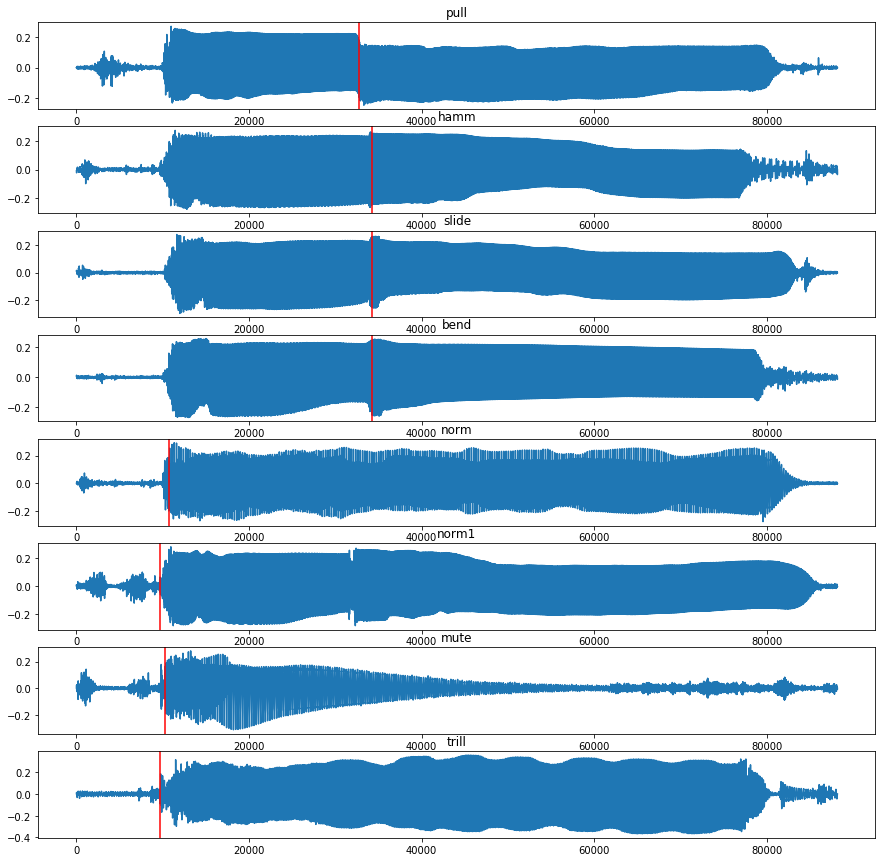

In [35]:
# Toggle between playing styles
fig = plt.figure(figsize = (15, 15))
for num in np.arange(len(x)):
    subplot_index = int('81' + str(num + 1))
    ax = fig.add_subplot(subplot_index)
    ax.plot(x[num])
    clip, onset = onset_clip(x[num], x_split[num], sr)
    ax.axvline(x = onset, color = 'r')
    ax.set_title(title[num])

<font size = 4> <b> Onset detection on dataset

In [11]:
# Tracking folder names
folders = os.listdir('Dataset/wav/1')
folders.remove('.DS_Store')
print (folders)

['hamming_whole_step', 'slide_whole_step_up', 'slide_whole_step_down', 'trill', 'normal_whole_step_up', 'bending_up_whole', 'mute', 'pulling_whole_step', 'bending_up_down_whole', 'hamming_half_step', 'slide_half_step_up', 'pulling_half_step', 'normal_half_step_down', 'slide_half_step_down', 'normal_half_step_up', 'normal', 'bending_up_down_half', 'bending_up_half', 'normal_whole_step_down']


<font size = 4> Reading all wav_split files from wav_split_v1 folder and finding corresponding wav files

In [220]:
files = glob.glob("Dataset/wav_split_final_v1/**/**/*.wav")

In [221]:
wav_files = wav_path_gen(files)
wav_split_files = wav_split_onset_num(files)

In [234]:
index = []
for fp in wav_split_files:
    index.append(fp)

In [235]:
wav_audio = []
for fp in wav_files:
    x, sr = librosa.load(fp)
    wav_audio.append(x)

In [237]:
wav_split_audio = []
for fp in wav_split_files:
    x, sr = librosa.load(fp)
    wav_split_audio.append(x)

In [225]:
# Creating a column for corresponding filenames
filenames = []
for i in range(0, len(files)):
    temp_file_name = index[i].split('/')
    name = temp_file_name[len(index[i].split('/'))-1]
    filenames.append(name)

audio_data = pd.DataFrame(filenames)
audio_data.columns = ['filename']

In [226]:
style = []
for i in np.arange(len(files)):
    test = audio_data.filename[i].split('_')
    test = test[0]
    style.append(test)

In [227]:
tone = []
for file in files:
    tone_file = file.split('/')[2]
    tone.append(tone_file)

In [229]:
style = pd.DataFrame(style)
style.columns = ['style']
tone = pd.DataFrame(tone)
tone.columns = ['tone']
audio_data = pd.concat([audio_data, style, tone], axis = 1)

In [239]:
# Detecting onsets using librosa and picking the ones closest to the wav split files
all_clips = []
all_onset_samples = []
for audio in np.arange(len(wav_audio)):
    x = wav_audio[audio]
    x_split = wav_split_audio[audio]
    clip, onset_sample = onset_clip(x, x_split, sr)
    all_clips.append(clip)
    all_onset_samples.append(onset_sample)

/Users/saksham/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/Users/saksham/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [244]:
len(all_clips)

3322

In [243]:
len(all_onset_samples)

3322

In [246]:
all_onset_samples

[34304.0,
 34304.0,
 32256.0,
 34304.0,
 32768.0,
 21504.0,
 33280.0,
 34816.0,
 32256.0,
 32256.0,
 18944.0,
 34816.0,
 33792.0,
 33280.0,
 34304.0,
 32256.0,
 33792.0,
 33792.0,
 32768.0,
 32256.0,
 31744.0,
 34816.0,
 32768.0,
 32768.0,
 32256.0,
 32256.0,
 35840.0,
 32768.0,
 31232.0,
 33792.0,
 33280.0,
 32256.0,
 32768.0,
 32768.0,
 33280.0,
 33280.0,
 33792.0,
 34304.0,
 32768.0,
 33792.0,
 33792.0,
 33280.0,
 33792.0,
 31232.0,
 32768.0,
 32768.0,
 29184.0,
 34304.0,
 33280.0,
 15359.999999999998,
 32256.0,
 33280.0,
 32768.0,
 31232.0,
 32768.0,
 31744.0,
 34816.0,
 32256.0,
 32256.0,
 31232.0,
 31744.0,
 29184.0,
 31744.0,
 31232.0,
 29184.0,
 30719.999999999996,
 32768.0,
 29696.0,
 32256.0,
 33280.0,
 9728.0,
 10240.0,
 9216.0,
 11264.0,
 10240.0,
 9728.0,
 10752.0,
 8704.0,
 11264.0,
 8704.0,
 9728.0,
 11775.999999999998,
 10240.0,
 10752.0,
 8192.0,
 11264.0,
 12800.0,
 9728.0,
 11264.0,
 9216.0,
 8704.0,
 9728.0,
 11775.999999999998,
 12288.0,
 11264.0,
 10752.0,
 11775.

In [20]:
onset = pd.DataFrame(np.array(onsets))
onset.columns = ['onset']
audio_data = pd.concat([audio_data, onset], axis = 1)

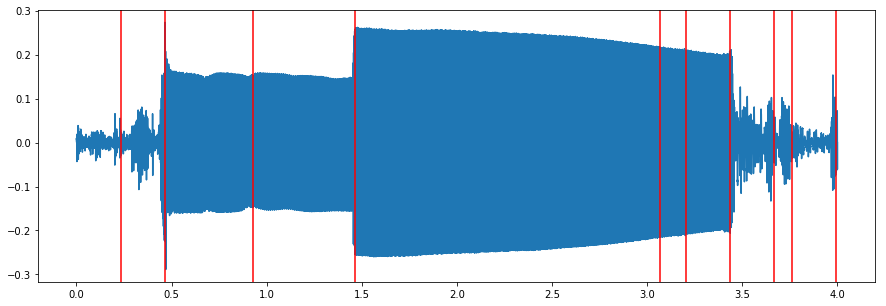

In [21]:
# Plotting onsets
filenumber = 27
x = audio_input[filenumber]
onsets_detected = np.array(candidates[filenumber])
plt.figure(figsize=(15, 5))
t = np.arange(0, len(x)/float(sr), 1./sr)
plt.plot(t, x)
for onset in onsets_detected:
    plt.axvline(x = onset, color = 'r')

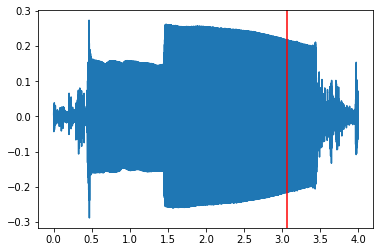

In [22]:
plt.plot(t, x)
plt.axvline(x = onsets[filenumber], color = 'r')

In [23]:
audio_data

,filename,style,tone,onset
0,hamming_whole_step_33.wav,hamming,1,1.462857
1,hamming_whole_step_27.wav,hamming,1,1.462857
2,hamming_whole_step_26.wav,hamming,1,1.555737
3,hamming_whole_step_32.wav,hamming,1,1.486077
4,hamming_whole_step_24.wav,hamming,1,1.555737
5,hamming_whole_step_30.wav,hamming,1,1.462857
6,hamming_whole_step_18.wav,hamming,1,1.462857
7,hamming_whole_step_19.wav,hamming,1,1.555737
8,hamming_whole_step_31.wav,hamming,1,1.486077
9,hamming_whole_step_25.wav,hamming,1,1.509297


In [24]:
audio_data[audio_data.onset < 1.4].count()

filename    3
style       3
tone        3
onset       3
dtype: int64

In [25]:
audio_data[audio_data.onset >1.7].count() 

filename    2
style       2
tone        2
onset       2
dtype: int64

In [26]:
onsets_energies = energyLR(audio_input[27], sr)
onsets_energies

array([[ 0.3236279 ,  1.177823  ],
       [ 5.381135  , 19.492262  ],
       [18.037766  , 18.03188   ],
       [18.989422  , 72.57406   ],
       [52.201797  , 49.0485    ],
       [48.05228   , 45.51455   ],
       [43.014412  , 10.01805   ],
       [ 3.3576417 ,  2.5351405 ],
       [ 2.649094  ,  0.7732611 ],
       [ 2.0321753 ,  0.16875264]], dtype=float32)

In [27]:
len(onsets_energies)

10

In [28]:
diff = abs(onsets_energies[:, 1] - onsets_energies[:, 0])
diff

array([8.5419506e-01, 1.4111127e+01, 5.8860779e-03, 5.3584637e+01,
       3.1532974e+00, 2.5377312e+00, 3.2996361e+01, 8.2250118e-01,
       1.8758330e+00, 1.8634226e+00], dtype=float32)

In [29]:
avg = []
for i in np.arange(len(onsets_energies)):
    avg_energy = np.mean(onsets_energies[i])
    avg.append(avg_energy)

avg = np.array(avg)
avg

array([ 0.7507254, 12.436699 , 18.034822 , 45.78174  , 50.62515  ,
       46.783417 , 26.516232 ,  2.946391 ,  1.7111776,  1.100464 ],
      dtype=float32)

In [30]:
top_energies = avg.argsort()[-3:][::-1]

In [31]:
top_energies

array([4, 5, 3])

In [32]:
final = np.divide(diff[top_energies], avg[top_energies])

In [33]:
np.argmax(final)

2

In [34]:
top_energies[np.argmax(final)]

3

<font size = 4> <b> Finalising the detection function

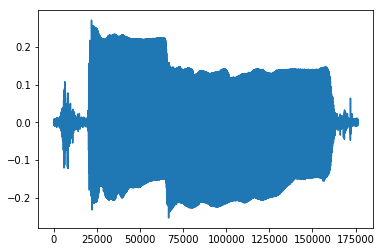

In [287]:
plt.plot(x_pull)

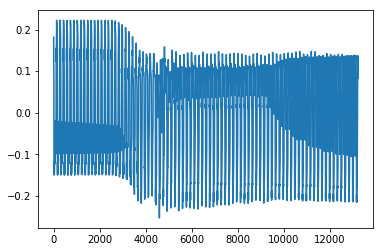

In [288]:
plt.plot(x_pull_split)

In [289]:
onset_frames = librosa.onset.onset_detect(x_pull, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)
onset_samples = onset_times * int(sr)

onset_frames_split = librosa.onset.onset_detect(x_pull_split, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times_split = librosa.frames_to_time(onset_frames_split)
onset_samples_split = onset_times_split * int(sr)

In [290]:
print (onset_times)
print (onset_times_split)

[0.11609977 0.30185941 0.39473923 0.95201814 2.9721542  7.82512472]
[0.13931973 0.510839  ]


In [309]:

corr = scipy.signal.correlate(x_pull, x_pull_split, mode='full')
print (corr)
print (len(corr))
print (np.argmax(corr))
print (len(x_pull))

[-0.00022493 -0.00046419 -0.00071224 ...  0.00053906  0.00037109
  0.00017578]
189631
75260
176401


/Users/saksham/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/Users/saksham/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [292]:
append = []
for i in np.arange(len(x_pull)-len(x_pull_split)):
    A = (x_pull[i:i+len(x_pull_split)] == x_pull_split[:len(x_pull_split)])
    append.append(A)
print (len(A))
print (A[0])
print (len(append))

13231
False
163170


In [310]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)
onset_samples = onset_times * int(sr)

In [313]:
onset_samples

array([ 10240.,  15360.,  20480.,  64512., 135168., 141312., 151552.,
       161792., 165888., 176128.])

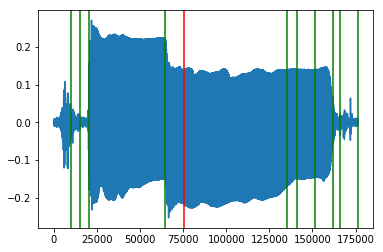

In [323]:
plt.plot(x_pull)
plt.axvline(x = np.argmax(corr), color = 'r')
for i in onset_samples:
    plt.axvline(x = i, color = 'g')

<font size = 4> <b> Detecting an onset using librosa, closest to the clipped file in Taiwan dataset

In [374]:

onset_frames

array([ 3,  7, 21, 64, 66])

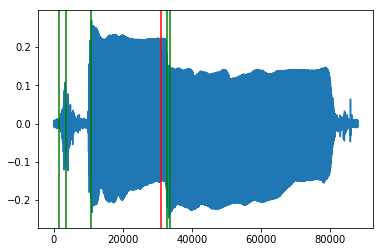

In [389]:
onset

32768.0